# $$QuickSort$$

## Código del QuickSort

In [29]:
import random, timeit, csv

def quick_sort(a):
    if len(a) <= 1: return a
    pivote = a[random.randint(0, len(a) - 1)]
    peq, gran, igual = [], [], []

    for i in a:
        if i < pivote: 
            peq.append(i)
        elif i == pivote:
            igual.append(i)
        else:
            gran.append(i)

    return quick_sort(peq) + igual + quick_sort(gran)

## Código para el tiempo de corrida de QuickSort

In [30]:
def timing_quick_sort(start, stop, step):
    global a
    results = []
    population = list(range(0, stop))
    for n in range(start, stop, step):
        size = start + n
        a = random.sample(population, size)
        print("Size={}".format(size))
        tn = timeit.timeit("quick_sort(a)", number = 1000, globals=globals())
        results.append((size, tn))
    return results

## Código que crea un archivo $.csv$ donde guarda los tiempos de corrida de QuickSort

In [31]:
def quick_sort_time_save(filename="quick_sort.csv", start=10, stop=1000, step=100):
    results = timing_quick_sort(start, stop, step)
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=';',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['i', 'n', 'time(n)'])
        for i, (n, tn) in enumerate(results):
            writer.writerow([i, n, tn])

## Tabla con los tiempos de corrida en formato $csv$

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('quick_sort.csv', sep = ";")
df

,i,n,time(n)
0,0,20,0.049088
1,1,120,0.327527
2,2,220,0.631757
3,3,320,0.976800
4,4,420,1.334945
5,5,520,1.625418
6,6,620,1.953615
7,7,720,2.377813
8,8,820,2.730510
9,9,920,3.100948


## Gráfica del QuickSort

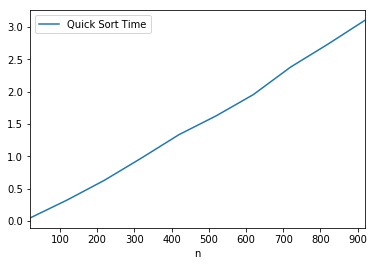

In [33]:
%matplotlib inline
df.plot(x = "n", y = "time(n)", label = "Quick Sort Time")

## $$\text{Análisis teórico de QuickSort}$$

## 1) Tamaño de los datos

$$\text{ n = len(a) }$$

## 2) Operaciones de interés

$$\text{= , < , == , call , random}$$
$$C_{max}(= , < , == , call , return)$$
$$C = C_{max}()$$ 

## 3) Relacion de recurrencia (RR)

$$T_{QuickSort}(n):$$

$$a = 2$$
$$b = 2$$
$$c = T_{C_{max}}$$
$$d = 1$$
$$f_{n} = 2 * f_{n/2} + c * n^d$$

## 4) Conclusión

$$\because \text{ QuickSort es }  \ominus(n^2) \text{ en el peor de los casos}$$